# Exploratory Data Analysis on Cardiovascular Diseases Dataset

Before dive into the machine learning part on this dataset, we first do some exploratory data analysis to gain some understanding of the data. 

### Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease. People with cardiovascular disease or who are at high cardiovascular risk need early detection and management wherein a machine learning model can be of great help.

### Attributes Information
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

### Source
The CVDs dataset can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv("https://raw.githubusercontent.com/YulinLi98/Sample_Repo/main/heart.csv")
df.head() #shows the first 5 rows of the dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
df.shape #size of the dataset

(918, 12)

In [3]:
missing_cnt = df.isnull().sum()
print(missing_cnt)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


There is no missing value.

---
## Qualitative variables analysis

Since the dataset specially examines heart disease status, so we start by graphing counts for those who have heart disease those who not have.

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

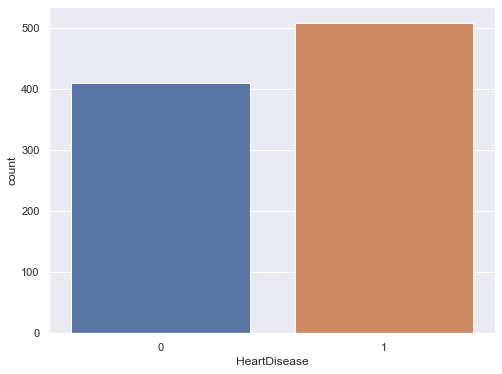

In [22]:
# Countplot for the variable 'HeartDisease'
plt.figure(figsize=(8,6))
sns.countplot(x = "HeartDisease", data = df)

In [11]:
# Calculate the percentage of people having heart disease
cnt_have_disease = len(df[df.HeartDisease==1])
print(f'Percentage of people having heart disease: {round(cnt_have_disease/len(df),2)}')

Percentage of people having heart disease: 0.55


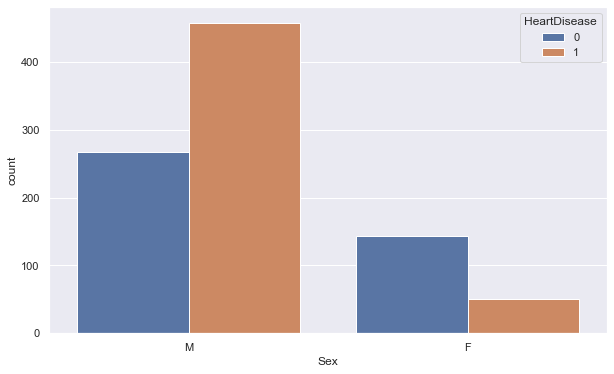

In [23]:
# Countplot for 'Sex' by 'HeartDisease'
plt.figure(figsize=(10,6))
sns.countplot(x=df.Sex ,hue=df.HeartDisease)
plt.show()

There is a huge difference between Male and Female, demonstrating that 'Sex' is an important factor for indicating if a person has heart disease.

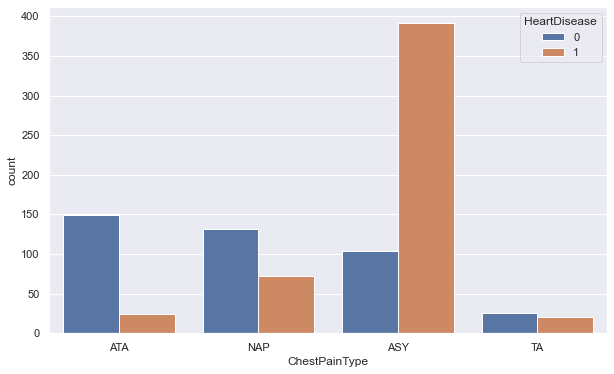

In [24]:
# Countplot for 'ChestPainType' by 'HeartDisease'
plt.figure(figsize=(10,6))
sns.countplot(x=df.ChestPainType,hue=df.HeartDisease)
plt.show()

From the plot, we can see that there is significance different in between each ChestPain Type. People with Atypical Angina seem to be less susceptible for having heart disease in comparison with other categories. Surprisingly, asymptotic people have a considerable tendency of heart disease.

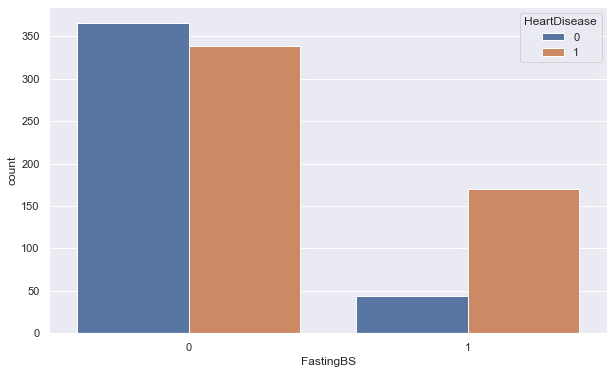

In [25]:
# Countplot for 'FastingBS' by 'HeartDisease'
plt.figure(figsize=(10,6))
sns.countplot(x=df.FastingBS,hue=df.HeartDisease)
plt.show()

The graph above shows that people with large fasting blood sugar have higher percentage of having heart diseases.

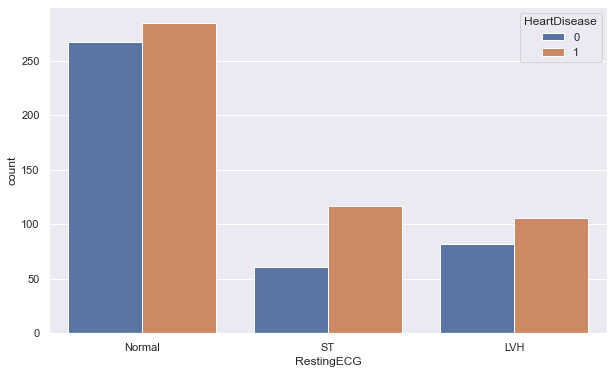

In [26]:
# Countplot for 'RestingECG' by 'HeartDisease'
plt.figure(figsize=(10,6))
sns.countplot(x=df.RestingECG,hue=df.HeartDisease)
plt.show()

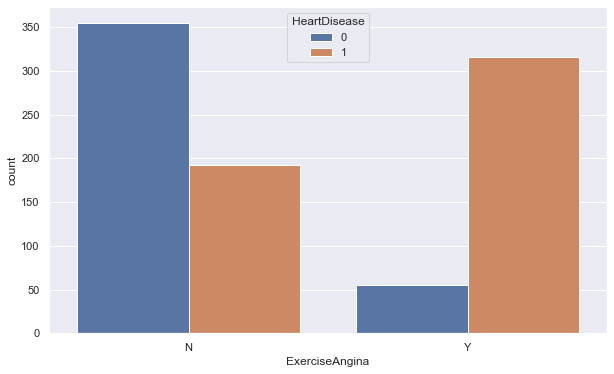

In [27]:
# Countplot for 'ExerciseAngina' by 'HeartDisease'
plt.figure(figsize=(10,6))
sns.countplot(x=df.ExerciseAngina,hue=df.HeartDisease)
plt.show()

There is a huge difference between people who had and hadn’t had exercised-induced angina, demonstrating that this variable is an important factor for indicating if a person has heart disease.

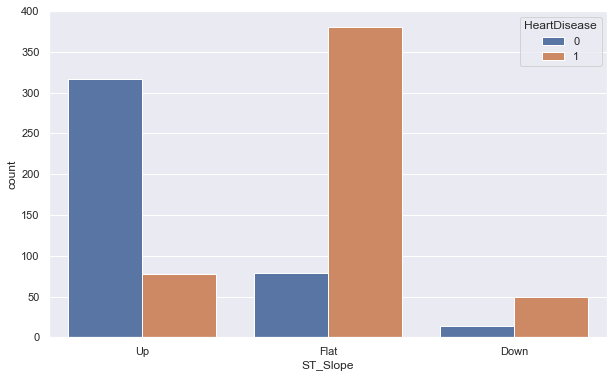

In [28]:
# Countplot for 'ST_Slope' by 'HeartDisease'
plt.figure(figsize=(10,6))
sns.countplot(x=df.ST_Slope,hue=df.HeartDisease)
plt.show()

The above plot shows that people with flat slope of the peak exercise ST segment have much higher chance of having heart diseases compared with other 2 types.

---
## Quantitative variables analysis 
Now the analysis will concentrate on quantitative variables.

Text(0.5, 1.0, 'Distribution of Age by Heart Disease Status')

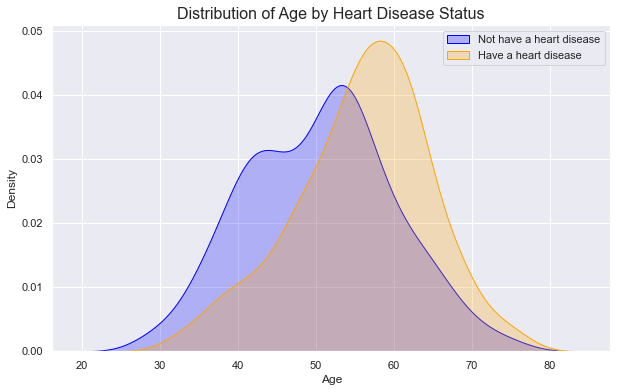

In [30]:
# Distribution of Age by HeartDisease
plt.figure(figsize=(10,6))
ax = sns.kdeplot(df.Age[df.HeartDisease == 0],
                color="Blue", shade = True)
ax = sns.kdeplot(df.Age[df.HeartDisease == 1],
                ax =ax, color="Orange", shade= True)
ax.legend(["Not have a heart disease","Have a heart disease"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Age')
ax.set_title("Distribution of Age by Heart Disease Status", fontsize = 16)

The plot above shows that older people tend to be more likely to have heart diseases.

Text(0.5, 1.0, 'Distribution of resting blood pressure by Heart Disease Status')

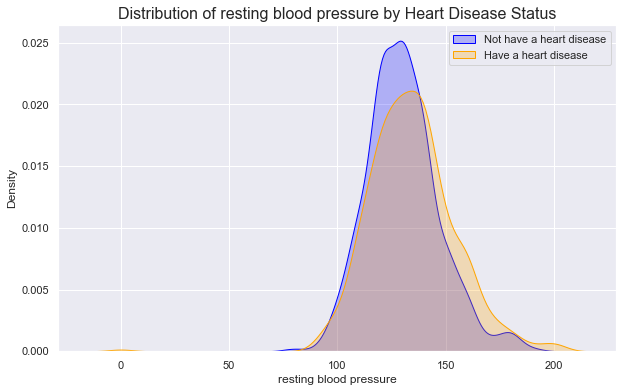

In [31]:
# Distribution of RestingBP by HeartDisease
plt.figure(figsize=(10,6))
ax = sns.kdeplot(df.RestingBP[df.HeartDisease == 0],
                color="Blue", shade = True)
ax = sns.kdeplot(df.RestingBP[df.HeartDisease == 1],
                ax =ax, color="Orange", shade= True)
ax.legend(["Not have a heart disease","Have a heart disease"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('resting blood pressure')
ax.set_title("Distribution of resting blood pressure by Heart Disease Status", fontsize = 16)

The plot above shows that people with higher resting blood pressue are more likely to have heart diseases.

Text(0.5, 1.0, 'Distribution of Cholesterol by Heart Disease Status')

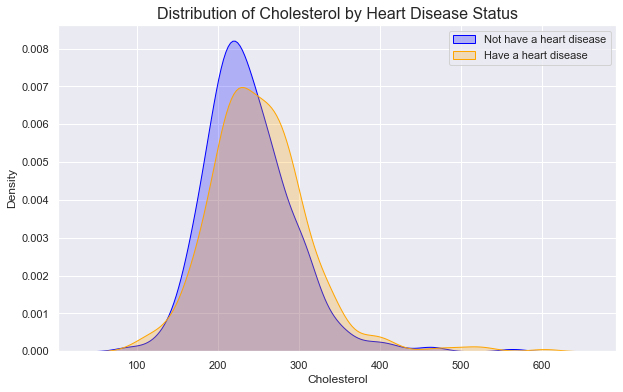

In [37]:
# Distribution of Cholesterol by HeartDisease
plt.figure(figsize=(10,6))
ax = sns.kdeplot(df.Cholesterol[(df.HeartDisease == 0) & (df.Cholesterol!=0)],
                color="Blue", shade = True)
ax = sns.kdeplot(df.Cholesterol[(df.HeartDisease == 1) & (df.Cholesterol!=0)],
                ax =ax, color="Orange", shade= True)
ax.legend(["Not have a heart disease","Have a heart disease"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Cholesterol')
ax.set_title("Distribution of Cholesterol by Heart Disease Status", fontsize = 16)

Text(0.5, 1.0, 'Distribution of maximum heart rate achieved by Heart Disease Status')

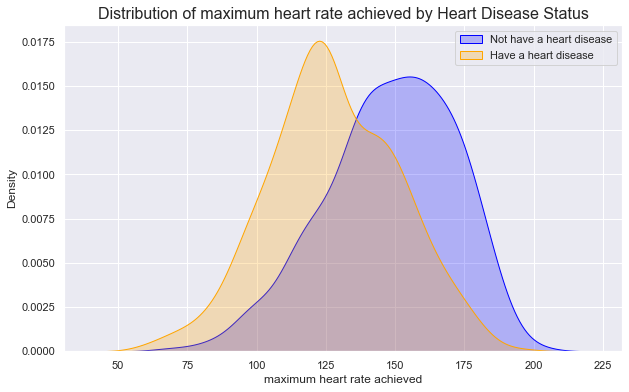

In [44]:
# Distribution of MaxHR by HeartDisease
plt.figure(figsize=(10,6))
ax = sns.kdeplot(df.MaxHR[(df.HeartDisease == 0)],
                color="Blue", shade = True)
ax = sns.kdeplot(df.MaxHR[(df.HeartDisease == 1)],
                ax =ax, color="Orange", shade= True)
ax.legend(["Not have a heart disease","Have a heart disease"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('maximum heart rate achieved')
ax.set_title("Distribution of maximum heart rate achieved by Heart Disease Status", fontsize = 16)

The plot above shows that people with lower maximum heart rate are more likely to have heart diseases.

Text(0.5, 1.0, 'Distribution of Oldpeak by Heart Disease Status')

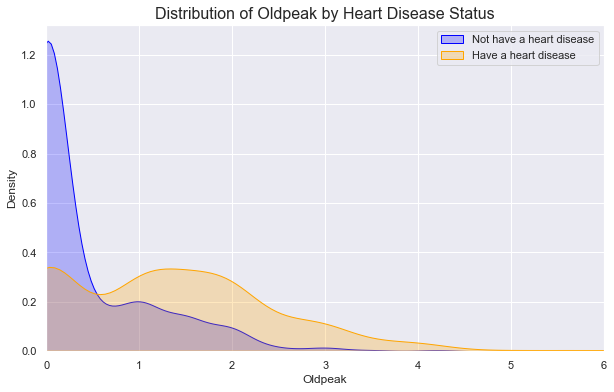

In [50]:
# Distribution of Oldpeak by HeartDisease
plt.figure(figsize=(10,6))
ax = sns.kdeplot(df.Oldpeak[(df.HeartDisease == 0)],
                color="Blue", shade = True)
ax = sns.kdeplot(df.Oldpeak[(df.HeartDisease == 1)],
                ax =ax, color="Orange", shade= True)
plt.xlim(0,6)
ax.legend(["Not have a heart disease","Have a heart disease"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Oldpeak')
ax.set_title("Distribution of Oldpeak by Heart Disease Status", fontsize = 16)

People with larger oldpeak rate are more likely to have heart diseases.

---
## Check for Correlation

In order to check for correlation, we will first encode some of the catogorical variables into numerical values.

<AxesSubplot:>

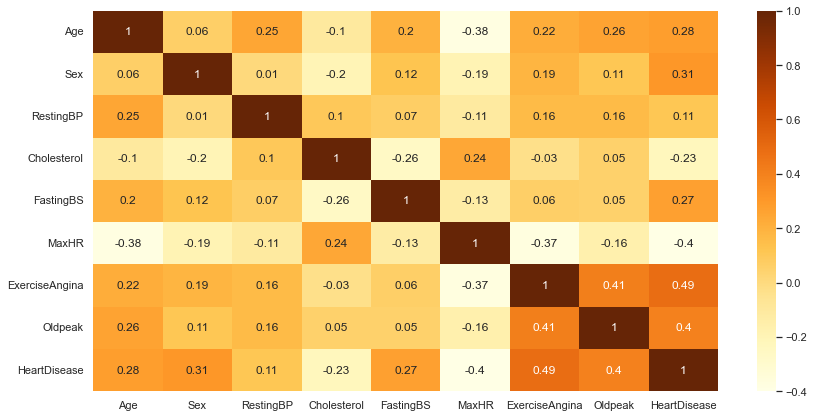

In [54]:
df.Sex = df.Sex.replace({'M':1, 'F':0})
df.ExerciseAngina = df.ExerciseAngina.replace({'Y':1, 'N':0})

correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

We can see that 'ExerciseAngina', 'Oldpeak' and 'HeartDisease' are correlated.